
# GRIP MAY'21 Batch



#### SHIVANGI CHAMOLI
#### DATA SCIENCE AND BUSINESS ANALYTICS INTERN
#### THE SPARKS FOUNDATION

### TASK-1: Prediction using Supervised Machine Learning

#### Problem Statement -  
Predict the percentage of an student based on the number of hours he studies by using Linear Regression Supervised Machine Learning Algorithm This task consisits of only two variables where the feature is the number of hours studied and the target value is the percentage score. It is a simple linear regression task.

#### STEP 1: IMPORTING THE DATASET

In [41]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
#reading the data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data sucssfully imported")

Data sucssfully imported


In [97]:
#returns data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [98]:
#dimension of the data frame
data.shape

(25, 2)

In [99]:
#statistical description of the data frame
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [46]:
#checking for data types of all the columns
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [47]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### STEP 2 : DATA VISUALISATION

<AxesSubplot:xlabel='Scores'>

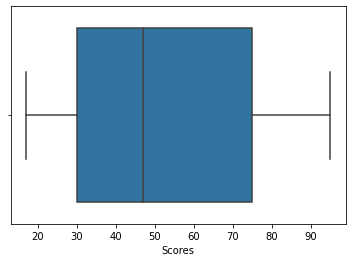

In [48]:
# Checking for outliers
sns.boxplot(x=data['Scores'])

<AxesSubplot:ylabel='Hours'>

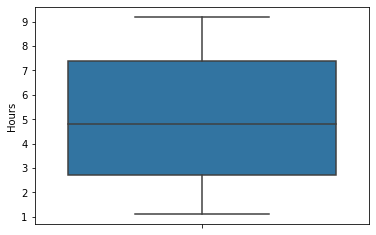

In [49]:
sns.boxplot(y=data['Hours'])

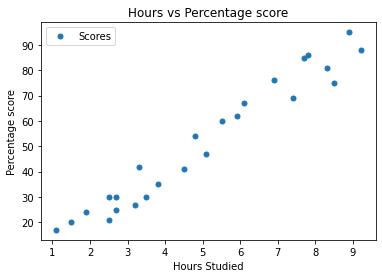

In [50]:
#lets plot our data points on a 2D graph to check if we can find any relationship between them. The following is the steps:

data.plot(x= 'Hours', y= 'Scores', style = '.', markersize=10)
plt.title('Hours vs Percentage score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

So we can clearly say from the above graph that there is a positive correlation between the 2 variables

In [54]:
#to determine the correlation between the 2 variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Thus there is a positive correlation between these 2 variables.

#### STEP 3: DATA PREPARATION

We will split the data into train set and test set using scikit learn library, here 'y' is the dependent variable and 'x' is  the indepedent variable

In [63]:
X = data.iloc[:,:-1].values #will take only first column i.e 'Hours' column which is features
y = data.iloc[:,1].values #will take only last column i.e 'Scores'

In [64]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [65]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

As we have our data so now we will split the data into training and test data using scikit learn library train_test_split() method

In [67]:
#importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x , train_y , test_y = train_test_split(X,y,test_size=0.2, random_state=0)

Above we have given test_size = 0.2 which means 20% of the data will be used for testing and 80% for training the model

#### STEP 4 - TRAINING THE LINEAR REGRESSION MODEL

In [68]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(train_x,train_y) #using the training dataset to train the model
print("Training successful")

Training successful


Parameters of Linear Regression

In [69]:
m = lr.coef_
c = lr.intercept_

so here m = determines slope of the line and c= determines intercept of the line

#### STEP 5 - VISUALIZING THE MODEL

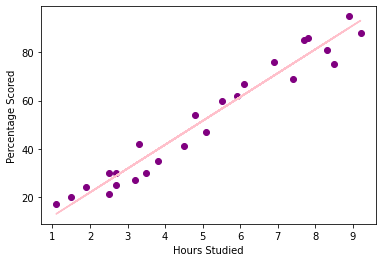

In [75]:
line = m* X + c
plt.scatter(X, y, color='purple')
plt.plot(X,line, color = 'pink')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In [76]:
print("Training Score = ",lr.score(train_x,train_y)*100)

Training Score =  95.15510725211553


#### STEP 6 - MAKING PREDICTIONS

Now that we have trained our model, its time to make some predictions

In [77]:
y_pred = lr.predict(test_x)  #predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual data and predicted data

In [82]:
data = pd.DataFrame({'Actual':test_y, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### STEP 7 -EVALUATING THE MODEL

There are 3 main metrics for model evaluation in regression:
    
1. Mean Absolute Error(MAE)
2. Mean Square Error(MSE)/ Root Mean Square Error(RMSE)
3. R Square/ Adjusted R Square

In [85]:
#importing evaluation metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [86]:
#mean absolute error
print("Mean Absolute Error :",mae(test_y,y_pred))

Mean Absolute Error : 4.183859899002975


In [87]:
#mean squared error
print("Mean Squared Error :",mse(test_y,y_pred))

Mean Squared Error : 21.5987693072174


In [88]:
#root mean squared error
print("Mean Absolute Error :",mse(test_y,y_pred,squared = False))

Mean Absolute Error : 4.6474476121003665


In [89]:
#r2_score
print(" r2_score :",r2_score(test_y,y_pred))

 r2_score : 0.9454906892105356


##### What will be the predicted score if a student studies for 9.25hrs/day?

In [91]:
hours= [[9.25]]
pred = lr.predict(hours)
print("Number of hours studied ={}".format(hours))
print("Predicted score if a student studies for 9.25hrs/day ={}".format(pred[0]))

Number of hours studied =[[9.25]]
Predicted score if a student studies for 9.25hrs/day =93.69173248737538


#### STEP 8 - CONCLUSION

##### Thus, the score of student who studies for 9.25hrs/day is 93.893%